In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd "datasets/olist_ecommerce"

C:\Users\Visagio\Downloads\Poli\data_science\notebooks\datasets\olist_ecommerce


In [3]:
customers_file_name = 'olist_customers_dataset.csv'
orders_file_name = 'olist_orders_dataset.csv'
geolocation_file_name = 'olist_geolocation_dataset.csv'
products_file_name = 'olist_products_dataset.csv'
order_items_file_name = 'olist_order_items_dataset.csv'
sellers_file_name = 'olist_sellers_dataset.csv'
order_payments_file_name = 'olist_order_payments_dataset.csv'
product_translation_file_name = 'product_category_name_translation.csv'
order_reviews_file_name = 'olist_order_reviews_dataset.csv'

In [4]:
df_customers = pd.read_csv(customers_file_name,sep=',')
df_orders = pd.read_csv(orders_file_name,sep=',')
df_geolocation = pd.read_csv(geolocation_file_name,sep=',')
df_products = pd.read_csv(products_file_name,sep=',')
df_order_items = pd.read_csv(order_items_file_name,sep=',')
df_sellers = pd.read_csv(sellers_file_name,sep=',')
df_order_payments = pd.read_csv(order_payments_file_name,sep=',')
df_order_reviews = pd.read_csv(order_reviews_file_name,sep=',')

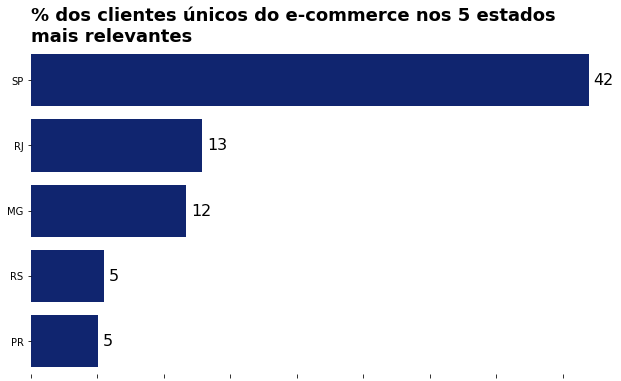

In [5]:
customer_states = df_customers.groupby('customer_state')
unique_customers_by_state = customer_states.customer_unique_id.nunique().sort_values(ascending=False).to_frame()

unique_customers_by_state['customer_state'] = unique_customers_by_state.index
unique_customers_by_state['perc_total_customers'] = unique_customers_by_state.customer_unique_id *(100 / df_customers.customer_unique_id.nunique())

f, ax = plt.subplots(figsize=(10,6))
sns.set_color_codes("dark")

splot = sns.barplot(x="perc_total_customers", y="customer_state", data=unique_customers_by_state.head(5), color="b")

# Add annotations of values
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 16)

# Add a legend and informative axis label

ax.set(xlim=(0, max(unique_customers_by_state['perc_total_customers'])), 
       xlabel='', ylabel='', xticklabels=[])

ax.set_title("% dos clientes únicos do e-commerce nos 5 estados \nmais relevantes",
             size=18,fontweight="bold",loc = 'left')
ax.grid(False)
sns.despine(offset=10, trim=True, left=True, bottom=True);
plt.show()

In [6]:
df_customer_orders = pd.merge(
    pd.merge(df_customers, df_orders, how='inner', on="customer_id", validate="one_to_one"),
    pd.merge(df_order_payments, df_order_reviews, how='inner', on="order_id"),
    how='inner', on="order_id")

df_order_products = pd.merge(df_order_items,df_products,how='inner',on='product_id')

In [7]:
# Add number of order items and sum of items price per order

df_grouped_orders = df_order_products.groupby('order_id', as_index=False).agg(
    {'product_id' : ['count','nunique'], 'price' : 'sum'})
df_grouped_orders.columns = ['order_id', 'number_of_items','number_of_unique_items','sum_of_item_prices']

df_customer_orders = pd.merge(df_customer_orders,df_grouped_orders, how='inner', on='order_id')
df_customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,number_of_items,number_of_unique_items,sum_of_item_prices
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,1,230.00


In [8]:
df_customer_orders.order_purchase_timestamp = pd.to_datetime(df_customer_orders.order_purchase_timestamp)

df_first_orders = df_customer_orders.groupby('customer_unique_id', as_index = False).agg(
                        {'order_purchase_timestamp':'min'})
df_first_orders.columns = ['customer_unique_id','first_purchase_timestamp']

df_customer_orders = pd.merge(df_customer_orders,df_first_orders,how='inner',on='customer_unique_id')

In [9]:
df_customer_orders['days_since_first_purchase'] = ((df_customer_orders['order_purchase_timestamp'].dt.date
                                                   - df_customer_orders['first_purchase_timestamp'].dt.date)/np.timedelta64(1,'D')).astype(int)

In [10]:
# Orders dataset in order to find last order previous than current order
df_customer_orders = df_customer_orders.sort_values(by=['customer_unique_id','order_purchase_timestamp'])
df_customer_orders.reset_index(drop=True, inplace=True)

In [11]:
# Searches dataset for last purchase date per customer
df_customer_orders.loc[df_customer_orders['days_since_first_purchase'] == 0,'last_purchase_timestamp'] = pd.to_datetime(np.nan)

for idx in df_customer_orders[df_customer_orders['days_since_first_purchase'] > 0].index:
    df_customer_orders.loc[idx, 'last_purchase_timestamp'] = df_customer_orders.loc[idx-1,'order_purchase_timestamp']

In [12]:
# Calculates number of days since last purchase per customer
df_customer_orders.loc[df_customer_orders['days_since_first_purchase'] == 0,'days_since_last_purchase'] = 0
df_customer_orders.loc[df_customer_orders['days_since_first_purchase'] > 0,'days_since_last_purchase'] = ((df_customer_orders.loc[df_customer_orders['days_since_first_purchase'] > 0,'order_purchase_timestamp'].dt.date
                                                   - df_customer_orders.loc[df_customer_orders['days_since_first_purchase'] > 0,'last_purchase_timestamp'].dt.date)/np.timedelta64(1,'D')).astype(int)

In [14]:
# Filter only interesting features

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,103652.0,35091.929919,29747.183499,1003.00,11370.00,24370.00,58430.00,99990.00
payment_sequential,103652.0,1.092598,0.707255,1.00,1.00,1.00,1.00,29.00
payment_installments,103652.0,2.858314,2.689642,0.00,1.00,1.00,4.00,24.00
payment_value,103652.0,153.591295,215.698844,0.00,56.78,100.00,171.61,13664.08
review_score,103652.0,4.087205,1.345213,1.00,4.00,5.00,5.00,5.00
number_of_items,103652.0,1.141464,0.535858,1.00,1.00,1.00,1.00,21.00
number_of_unique_items,103652.0,1.038822,0.228752,1.00,1.00,1.00,1.00,8.00
sum_of_item_prices,103652.0,137.718773,210.744537,0.85,45.90,85.99,149.90,13440.00
days_since_first_purchase,103652.0,2.910614,26.027842,0.00,0.00,0.00,0.00,633.00
days_since_last_purchase,103652.0,2.470276,23.481828,0.00,0.00,0.00,0.00,609.00


(array([1.01257e+05, 1.92300e+03, 4.11000e+02, 3.50000e+01]),
 array([1, 3, 5, 7, 9]),
 <a list of 4 Patch objects>)

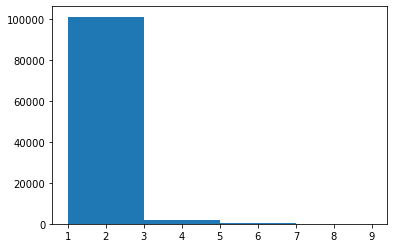

In [34]:
plt.hist(df_customer_orders.number_of_items, bins = list(np.arange(1,10,2)))

(array([1.03237e+05, 3.90000e+02, 2.10000e+01, 4.00000e+00]),
 array([1, 3, 5, 7, 9]),
 <a list of 4 Patch objects>)

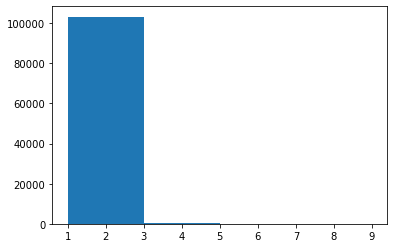

In [35]:
plt.hist(df_customer_orders.number_of_unique_items, bins = list(np.arange(1,10,2)))

(array([1.473e+03, 1.461e+03, 4.172e+03, 6.861e+03, 7.105e+03, 6.996e+03,
        7.209e+03, 6.244e+03, 5.409e+03, 4.858e+03, 4.848e+03, 4.525e+03,
        3.550e+03, 3.730e+03, 3.184e+03, 2.846e+03, 2.907e+03, 2.330e+03,
        2.006e+03, 1.892e+03, 1.596e+03, 1.589e+03, 1.248e+03, 1.134e+03,
        9.290e+02, 8.480e+02, 7.590e+02, 6.470e+02, 5.900e+02, 5.330e+02,
        5.200e+02, 6.490e+02, 4.700e+02, 4.080e+02, 4.240e+02, 3.880e+02,
        4.160e+02, 3.310e+02, 2.850e+02, 2.450e+02, 2.260e+02, 3.150e+02,
        2.120e+02, 1.790e+02, 1.660e+02, 1.740e+02, 1.640e+02, 1.580e+02,
        1.220e+02, 1.060e+02, 1.160e+02, 1.550e+02, 1.200e+02, 9.000e+01,
        1.070e+02, 1.090e+02, 9.600e+01, 9.500e+01, 5.700e+01, 9.700e+01,
        1.140e+02, 1.260e+02, 1.030e+02, 8.600e+01, 7.700e+01, 6.500e+01,
        7.900e+01, 8.600e+01, 6.700e+01, 5.800e+01, 5.400e+01, 7.500e+01,
        6.500e+01, 5.100e+01, 4.700e+01, 5.200e+01, 4.700e+01, 4.200e+01,
        4.700e+01, 3.200e+01, 3.500e+0

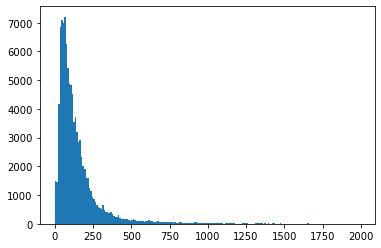

In [39]:
plt.hist(df_customer_orders.payment_value, bins = list(np.arange(0,2000,10)))